## Observations and Insights 

    -First, the data seems to show that there is a fairly strong correlation between the weight of the mouse and the volume of the tumor.  This does not mean causation, but could be further developed.  
    -There also seems to be an indication that tumor size shrinks the longer the mouse is in treatment.  This was only analyzed for one mouse in one regimen,though,so this would need to be further fleshed out from other mice and treatments in the data set. 
    -Finally, Capomulin and Ramicane appear to be the most effective at reducing tumor size.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
TotalTable=pd.merge(mouse_metadata, study_results, on ="Mouse ID")

# Display the data table for preview
TotalTable

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#show totals-appears no NA's in table to clear
TotalTable.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
Mouse=TotalTable["Mouse ID"].value_counts()
Mousecount=len(Mouse)
Mousecount

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# This finds the duplicates
#DupeValues=TotalTable[TotalTable.duplicated(['Mouse ID', 'Timepoint'])]
#DupeValues


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Alternate that both find and drops the duplicates in one line
DV=TotalTable.drop_duplicates(['Mouse ID', 'Timepoint'])
DV
#Appears correct now only 1888 rows v. 1893 that we started with

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
# Number is the same, so nothing was delted incorrectly
Mouse=DV["Mouse ID"].value_counts()
Mousecount=len(Mouse)
Mousecount

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

VolMean= DV.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
VolMed=DV.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
VolVar=DV.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
VolStd=DV.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
VolSEM=DV.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

StatDF=pd.DataFrame({'Mean':VolMean, 'Median':VolMed, 'Variance':VolVar, 'Standard Deviation':VolStd, 'SEM':VolSEM})
StatDF


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#THis is a duplicate instruction
# Using the aggregation method, produce the same summary statistics in a single line
#I don't understand this instruction


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

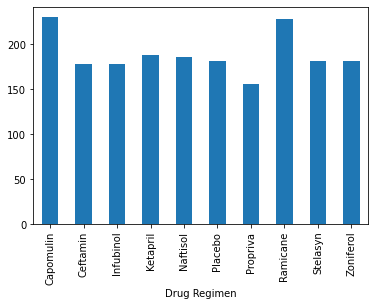

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
TotalTimePointsPerRegimen =DV.groupby(['Drug Regimen']).count()['Timepoint']
TotalTimePointsPerRegimen.plot.bar()
TotalTimePointsPerRegimen

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
#this is incorrect, need to come back
#x_axis=DV['Drug Regimen']
#plt.ylim(0,250)
#plt.bar(TotalTimePointsPerRegimen,200)

<AxesSubplot:title={'center':'Gender distribution in Study'}, ylabel='Mouse ID'>

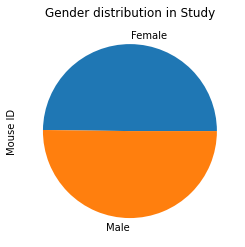

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Gender =DV.groupby('Sex').nunique()['Mouse ID']

Gender.plot.pie(title='Gender distribution in Study')


Text(0.5, 1.0, 'Gender Distribution in Study')

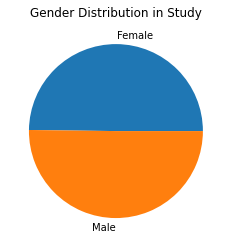

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Gender, labels=Gender.index)
plt.title('Gender Distribution in Study')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

FVolCap=DV.loc[DV['Drug Regimen']=='Capomulin',:]
FVolRam=DV.loc[DV['Drug Regimen']=='Ramicane',:]
FVolInf=DV.loc[DV['Drug Regimen']=='Infubinol',:]
FVolCef=DV.loc[DV['Drug Regimen']=='Ceftamin',:]
FVolCap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [14]:
# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
CapFinal = FVolCap.groupby('Mouse ID').max()['Timepoint']
FCap = pd.DataFrame(CapFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capmerge = pd.merge(FCap, DV, on=("Mouse ID","Timepoint"),how="left")
Capmerge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [15]:
#Ramicane
RamFinal = FVolRam.groupby('Mouse ID').max()['Timepoint']
FRam = pd.DataFrame(RamFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Rammerge = pd.merge(FRam, DV, on=("Mouse ID","Timepoint"),how="left")


In [16]:
#Infubinol
InfFinal = FVolInf.groupby('Mouse ID').max()['Timepoint']
FInf = pd.DataFrame(InfFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infmerge = pd.merge(FInf, DV, on=("Mouse ID","Timepoint"),how="left")


In [17]:
#Ceftamin
CefFinal = FVolCef.groupby('Mouse ID').max()['Timepoint']
FCef = pd.DataFrame(CefFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Cefmerge = pd.merge(FCef, DV, on=("Mouse ID","Timepoint"),how="left")


In [18]:
#Capmerge, Rammerge, Infmerge, Cefmerge
# Put treatments into a list for for loop (and later for plot labels)

#TopTx=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
#TVD=[]

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
Captumors = Capmerge["Tumor Volume (mm3)"]

quartiles =Captumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [20]:
#Ramicane
# Determine outliers using upper and lower bounds
Ramtumors = Rammerge["Tumor Volume (mm3)"]

quartiles =Ramtumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [21]:
#Infubinol
# Determine outliers using upper and lower bounds

Inftumors = Infmerge["Tumor Volume (mm3)"]

quartiles =Inftumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [22]:
#Ceftamin
    
# Determine outliers using upper and lower bounds
Ceftumors = Cefmerge["Tumor Volume (mm3)"]

quartiles =Ceftumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
  
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest----I can't get this to run

#BoxPlotData=['Captumors', 'Ramtumors', 'Inftumors', 'Ceftumors']
#TopTx=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']


#fig1, ax1 = plt.subplots()

#ax1.set_title('Tumor Volume per Mouse per Drug Regimen')
#ax1.set_ylabel('Final Volume')
#ax1.set_xlabel('Drug Regimen')
#ax1.boxplot(BoxPlotData, TopTx)

#plt.show()


#BoxPlotData=df.boxplot(column=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])


## Line and Scatter Plots

<AxesSubplot:title={'center':'Tumor Volume over Time'}, xlabel='Time Point', ylabel='Volume'>

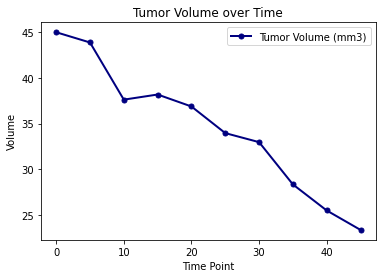

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Choosing mouse s185 based on head() of prior list
Lineplot=FVolCap.loc[FVolCap['Mouse ID']=='s185',]
#Lineplot.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
Plot=ax = Lineplot.plot(x='Timepoint', y='Tumor Volume (mm3)',lw=2, colormap='jet', marker='.', markersize=10, title='Tumor Volume over Time')
ax.set_xlabel("Time Point")
ax.set_ylabel("Volume")
Plot

<AxesSubplot:title={'center':'Tumor Volume Compared to Weight of Mouse'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

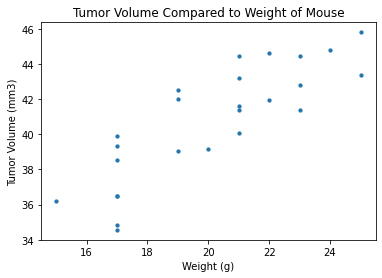

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
AvgFVolCap=FVolCap.groupby(['Mouse ID']).mean()
AvgFVolCap.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)', lw=2, colormap='jet', marker = '.', title='Tumor Volume Compared to Weight of Mouse')

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Correlation=round(st.pearsonr(AvgFVolCap['Weight (g)'], AvgFVolCap['Tumor Volume (mm3)'])[0],2)
Correlation

0.84

In [27]:
#Linear regression model
x_values = AvgFVolCap['Weight (g)']
y_values = AvgFVolCap['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept



line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{Correlation}")
print(f"stderr:{stderr}")

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


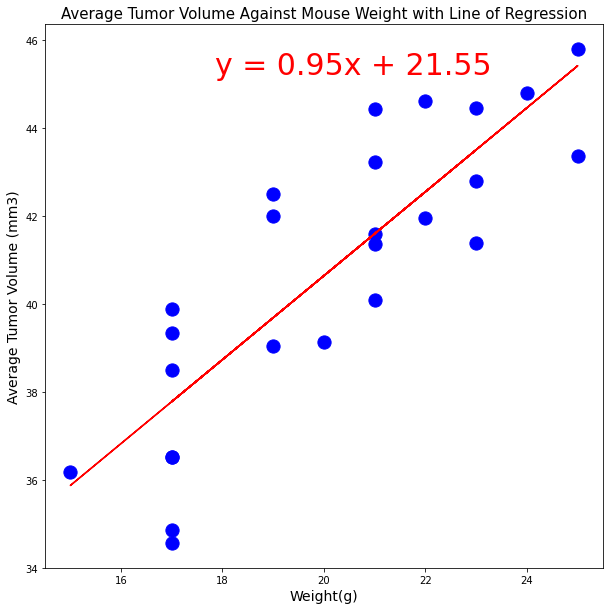

In [28]:


# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Average Tumor Volume Against Mouse Weight with Line of Regression',fontsize =15)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")


plt.show()